# Collaboration and Competition

---

In this notebook the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program is beeing solved with two agents utilising the DDPG algorithm and a shared replay buffer.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# import environment
from unityagents import UnityEnvironment

# import general stuff
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
# widget bar to display progress
!pip install progressbar
import progressbar as pb

# import specific / own stuff
import utils as ut
from ddpg_agent import Agent
from ddpg_agent import ReplayBuffer

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    lenEpisode = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        lenEpisode += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {:.2f}, Length of Episode is {} steps'.format(i, np.max(scores), lenEpisode))

Score (max over agents) from episode 1: 0.00, Length of Episode is 15 steps
Score (max over agents) from episode 2: 0.00, Length of Episode is 14 steps
Score (max over agents) from episode 3: 0.00, Length of Episode is 15 steps
Score (max over agents) from episode 4: 0.10, Length of Episode is 30 steps
Score (max over agents) from episode 5: 0.00, Length of Episode is 14 steps


 get some additional information about the variables

In [6]:
print('Last set of actions: {}'.format(actions))
print('Size of actions: {}'.format(actions.size))
print('Last rewards: {}'.format(rewards))
print('Last states: {}'.format(states))

Last set of actions: [[-1.          0.62165338]
 [-0.50191617 -1.        ]]
Size of actions: 4
Last rewards: [0.0, -0.009999999776482582]
Last states: [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.14030886 -1.5
  -0.          0.         -7.11741829  5.97645617 -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.9574213  -1.5
   0.          0.          7.11741829  5.97645617  0.          0.        ]]


### 4. Let's start training!

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

#### define Multi-Agent DDPG

In [8]:
def ma_ddpg(n_episodes=100, max_t=100, beta_start=1.0, beta_end=0.01, beta_episodeEnd=80):
    """Deep Deterministic Policy Gradient for multi agent setup.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps
        beta_start (float): starting value of epsilon, for epsilon-greedy action selection
        beta_end (float): minimum value of epsilon
        beta_episodeEnd (float): number of episodes for which eps_end is reached
    """
    solved = False
    scores = []                                # list containing scores from each episode
    actions = [0 for i in range(num_agents)]   # list containing actions for all agents
    scores_window = deque(maxlen=100)          # last 100 scores
    steps_window = deque(maxlen=100)           # last 100 steps per episode
    beta = beta_start                          # initialize beta, that is factor for adding noise
    beta_decay_linear = (beta_start-beta_end)/beta_episodeEnd # compute linear beta decay rate
    best_averagescore = 0                      # keep track of best average score to save if desired
    
    for i_episode in range(1, n_episodes+1):        
        env_info = env.reset(train_mode=True)[brain_name]  # reset unity enviroment
        state = env_info.vector_observations               # get the current state 
        score = np.zeros(num_agents)                       # initialize the score (for each agent)
        steps = 0                                            
        for t in range(max_t):
            # choose action and perform it
            for i in range(num_agents):
                actions[i] = agents[i].act(state[i], beta)
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            
            # send env data to agent and initiate learning
            next_state = env_info.vector_observations      # get the next state
            reward = env_info.rewards                      # get the reward
            done = env_info.local_done                     # see if episode has finished
            
            for i in range(num_agents):
                agents[i].step(state[i], actions[i], reward[i], next_state[i], done[i])
            
            # do some tracking on the rewards
            state = next_state
            score += reward
            steps += 1
            if np.any(done):
                break 
        scores_window.append(np.max(score))       # save most recent score
        steps_window.append(steps)                # save number of steps
        scores.append(np.max(score))              # save most recent score
        beta = max(beta_end, beta_start - beta_decay_linear*i_episode) # decrease beta
        if 2*np.mean(steps_window) > max_t:
            max_t = 2*int(np.mean(steps_window)) # increase maximum number of steps
        
        # give some information about current progress 
        ut.print_info(i_episode, scores_window, steps_window)
        if i_episode % 100 == 0:
            # update progress widget bar
            timer.update(i_episode)
            ut.print_info(i_episode, scores_window, steps_window)
            if np.mean(scores_window) > best_averagescore:
                best_averagescore = np.mean(scores_window)
                ut.save_agentcheckpoint(state_size, action_size, agents) # save agent networks
        if np.mean(scores_window)>=0.5 and not solved:
            # yeaaah, we did it!
            solved = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break   # uncomment to keep on going
    # finish timer
    timer.finish()    

    return scores

#### create the agents and replay buffer

In [9]:
# parameters for ReplayBuffer
BUFFER_SIZE = int(5e5) # replay buffer size
BATCH_SIZE = 512       # minibatch size for learning
print('Ratio Buffer/Batch: {:.2f}'.format(BUFFER_SIZE/BATCH_SIZE))
print('Estimate of episodes until learning is initiated: {:.2f}'.format(BATCH_SIZE/30))

# create one common replay memory
memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, 321)

# create and load agents (optional)
agents = ut.create_agents(state_size, action_size, num_agents, memory)
# agents = ut.load_agents(state_size, action_size, num_agents, memory)

Ratio Buffer/Batch: 976.56
Estimate of episodes until learning is initiated: 17.07


#### start the training

In [10]:
# parameters for learning
max_t=2000          # only as start value, will be increased inside the ma_ddpg algorithm
beta_start=1.0
beta_end=0.01
n_episodes=2000
beta_episodeEnd=n_episodes

# create progress bar to keep track 
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=n_episodes).start()

# do actual learning
scores = ma_ddpg(n_episodes, max_t, beta_start, beta_end, beta_episodeEnd)

# save learned agents if desired (best agent is saved within training loop)
# ut.save_agentcheckpoint(state_size, action_size, agents)

Episode 99	 Score Min/Mean/Max: 0.00 / 0.00 / 0.10 	 Steps Min/Mean/Max: 13 / 14.7 / 39

Episode 199	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 14 / 16.7 / 48

Episode 299	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 13 / 17.1 / 48

Episode 399	 Score Min/Mean/Max: 0.00 / 0.00 / 0.09 	 Steps Min/Mean/Max: 14 / 14.4 / 30

Episode 499	 Score Min/Mean/Max: 0.00 / 0.00 / 0.00 	 Steps Min/Mean/Max: 14 / 14.2 / 15

Episode 599	 Score Min/Mean/Max: 0.00 / 0.00 / 0.10 	 Steps Min/Mean/Max: 14 / 14.4 / 31

Episode 699	 Score Min/Mean/Max: 0.00 / 0.00 / 0.10 	 Steps Min/Mean/Max: 14 / 15.5 / 52

Episode 799	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 14 / 18.6 / 62

Episode 899	 Score Min/Mean/Max: 0.00 / 0.03 / 0.10 	 Steps Min/Mean/Max: 14 / 20.7 / 56

Episode 999	 Score Min/Mean/Max: 0.00 / 0.04 / 0.20 	 Steps Min/Mean/Max: 14 / 24.5 / 88

Episode 1099	 Score Min/Mean/Max: 0.00 / 0.03 / 0.20 	 Steps Min/Mean/Max: 13 / 21.2 / 71

Episode 1199	 Score Min/Mean/Max: 0.00 / 0.08 / 0.20 	 Steps Min/Mean/Max: 13 / 32.0 / 89

Episode 1299	 Score Min/Mean/Max: 0.00 / 0.15 / 0.60 	 Steps Min/Mean/Max: 13 / 59.6 / 258

Episode 1399	 Score Min/Mean/Max: 0.00 / 0.26 / 1.70 	 Steps Min/Mean/Max: 13 / 104.8 / 655

Episode 1475	 Score Min/Mean/Max: 0.00 / 0.50 / 2.00 	 Steps Min/Mean/Max: 18 / 196.8 / 767

Episode 1476	 Score Min/Mean/Max: 0.00 / 0.50 / 2.00 	 Steps Min/Mean/Max: 18 / 197.4 / 767
Environment solved in 1476 episodes!	Average Score: 0.50


In [11]:
#save data
filename = ut.get_numberedfilename('./data/scores_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'pkl')
with open(filename, 'wb') as f:
    pickle.dump(scores, f)

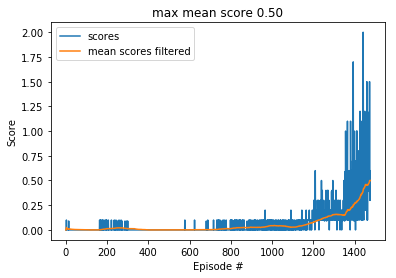

In [12]:
# find save name that doesn't already exist
filename = ut.get_numberedfilename('./data/plot_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'png')

# plot and save data
scores_filtered = ut.moving_average(scores)
plt.plot(scores, label='scores')
plt.plot(scores_filtered, label='mean scores filtered')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('max mean score {:.2f}'.format(np.max(scores_filtered)))
plt.savefig(filename)
plt.show()


evaluate performance over 100 episodes without exploration

In [13]:
# load best agents found and saved
agents = ut.load_agents(state_size, action_size, num_agents, memory)

scores = []                                # list containing scores from each episode
scores_window = deque(maxlen=100)          # last 100 scores
steps_window = deque(maxlen=100)           # last 100 steps per episode
    
for i_episode in range(1, 101):                                    # play game for 100 episodes
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    lenEpisode = 0
    score = np.zeros(num_agents)                       # initialize the score (for each agent)
    steps = 0   
    actions = [0 for i in range(num_agents)]               # list containing actions for all agents    
    while True:
        for i in range(num_agents):
            actions[i] = agents[i].act(states[i], beta=0.0)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        reward = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        states = next_states                               # roll over states to next time step
        # do some tracking on the rewards
        score += reward
        steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_window.append(np.max(score))       # save most recent score
    steps_window.append(steps)                # save number of steps
    scores.append(np.max(score))              # save most recent score
    ut.print_info(i_episode, scores_window, steps_window)    

Episode 100	 Score Min/Mean/Max: 0.09 / 1.22 / 2.70 	 Steps Min/Mean/Max: 24 / 467.4 / 1001

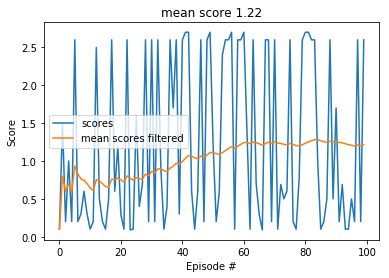

In [14]:
# find save name that doesn't already exist
filename = ut.get_numberedfilename('./data/evalplot_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'png')

# plot and save data
scores_filtered = ut.moving_average(scores)
plt.plot(scores, label='scores')
plt.plot(scores_filtered, label='mean scores filtered')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('mean score {:.2f}'.format(scores_filtered[-1]))
plt.savefig(filename)
plt.show()

save agents if desired as trained agents (careful, this will overwrite the data sets used in the next section)

In [15]:
#ut.save_agenttrained(state_size, action_size, agents) # save agent networks

### 5. watch trained agent

#### Load trained agent if needed

Note: you have to run sections 1 to 3 of the code above for initialisation of parameters. Training in section 4 can be skipped, and saved agents are loaded instead.

In [16]:
if 'agents' in locals():
    print('using new trained agents')
else:
    print('no agents available, loading from file')
    memory = ReplayBuffer(action_size, int(5e5), 512, 321)    # as no training in this section, just a dummy
    agents = ut.load_trainedagents(state_size, action_size, num_agents, memory)

using new trained agents


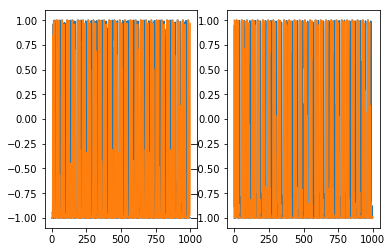

Score (max over agents) from episode 1: 2.70, Length of Episode is 1001 steps


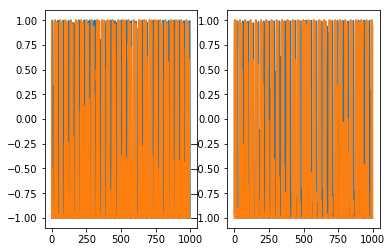

Score (max over agents) from episode 1: 2.60, Length of Episode is 1001 steps


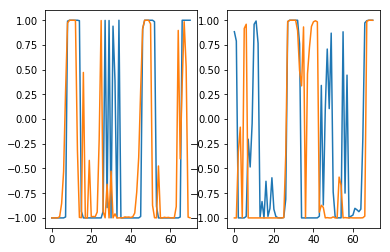

Score (max over agents) from episode 1: 0.20, Length of Episode is 71 steps


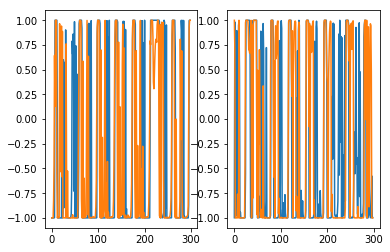

Score (max over agents) from episode 1: 0.70, Length of Episode is 299 steps


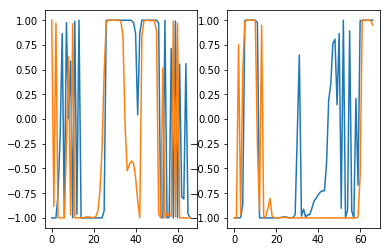

Score (max over agents) from episode 1: 0.10, Length of Episode is 67 steps


In [17]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    lenEpisode = 0
    actions = [0 for i in range(num_agents)]               # list containing actions for all agents
    actions_epi = [[] for i in range(num_agents)]         # list containing actions for all agents
    while True:
        for i in range(num_agents):
            actions[i] = agents[i].act(states[i], beta=0.0)
            actions_epi[i].append(actions[i])
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        lenEpisode += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    ut.plot_actions_episode(actions_epi)
    print('Score (max over agents) from episode {}: {:.2f}, Length of Episode is {} steps'.format(i, np.max(scores), lenEpisode))

When finished, you can close the environment.

In [18]:
#env.close()